In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
wine=load_wine()

In [0]:
data=pd.DataFrame(wine.data, columns=wine.feature_names)
y=pd.DataFrame(wine.target,columns=["name"],dtype="category")

In [16]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:
df_wine = pd.concat([y, data], axis=1) # column bind

In [37]:
df_wine.head()

,name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [38]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**PCA**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_wine.iloc[:,1:] 
y = df_wine.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14, stratify = y)

# 표준화
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [41]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=df_wine.columns[1:])
cov_mat = np.cov(X_train_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals_ = sorted(eig_vals, reverse = True) #고유값 크기순서로 추출
eig_vals_

[4.928023691631196,
 2.4738364033982148,
 1.4893951372526317,
 0.9856961114869948,
 0.8517559482742443,
 0.5858180912927322,
 0.4365298556460185,
 0.34368180802571185,
 0.2923261011198426,
 0.2569821861134573,
 0.20024556720107642,
 0.1697545442241059,
 0.09164561124435075]

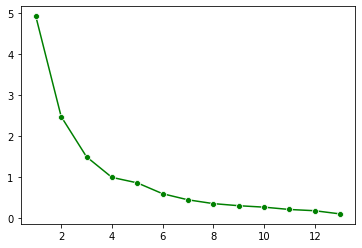

In [42]:
sns.lineplot(x = range(1, 14), y = eig_vals_, color = 'g', marker = 'o') #시각화

In [43]:
from sklearn.decomposition import PCA
pca = PCA() 
X_pca = pca.fit_transform(X_train_scaled) 

np.cumsum(pca.explained_variance_ratio_) #누적비율을 확인하여 70%~80% 정도 설명하는 변수까지 포함

array([0.37602166, 0.56478213, 0.67842704, 0.75363835, 0.81862965,
       0.86332917, 0.89663759, 0.92286145, 0.94516673, 0.96477517,
       0.98005445, 0.99300719, 1.        ])

Logistic Regression 가장 좋은 결과


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression as LR

pca_pipe_1 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)), #4개 포함
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_1.fit(X_train, y_train)

print('Logit Train - PCA :', pca_pipe_1.score(X_train, y_train))
print('Logit Test - PCA :', pca_pipe_1.score(X_test, y_test))

Logit Train - PCA : 1.0
Logit Test - PCA : 0.9259259259259259


LDA

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca_pipe_2 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', LDA())])
pca_pipe_2.fit(X_train, y_train)

print('LDA Train - PCA :', pca_pipe_2.score(X_train, y_train))
print('LDA Test - PCA :', pca_pipe_2.score(X_test, y_test))

LDA Train - PCA : 0.9596774193548387
LDA Test - PCA : 0.9074074074074074


QDA

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
pca_pipe_3 = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components = 4)),
                    ('estimator', QDA())])
pca_pipe_3.fit(X_train, y_train)

print('QDA Train - PCA :', pca_pipe_3.score(X_train, y_train))
print('QDA Test - PCA :', pca_pipe_3.score(X_test, y_test))

QDA Train - PCA : 0.9838709677419355
QDA Test - PCA : 0.8888888888888888


FA

In [0]:
from sklearn.decomposition import FactorAnalysis as FA

fa = FA()
X_fa = fa.fit_transform(X)

In [48]:
df_fa = pd.DataFrame(data=X_fa)
df_fa.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.014302,1.635006,-0.972815,-0.188294,0.674808,0.281847,-0.224184,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965034,-0.411003,-1.858834,-0.934911,-0.337345,0.217525,-0.138507,0.0,0.0,0.0,0.0,0.0,0.0
2,1.394755,-0.494738,0.210600,0.644627,0.469704,0.109788,0.125586,0.0,0.0,0.0,0.0,0.0,0.0
3,2.334586,0.015528,0.222738,0.007648,0.941469,0.205388,0.214657,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.036820,1.410068,0.092873,0.744068,0.433513,0.304921,-0.592490,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
!pip install -q factor_analyzer

     |████████████████████████████████| 40kB 3.3MB/s 


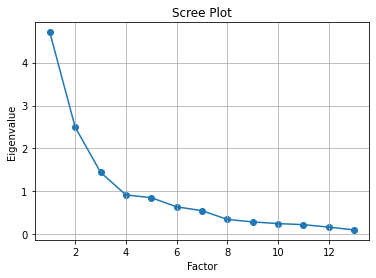

In [52]:
from factor_analyzer import FactorAnalyzer
fa_1 = FactorAnalyzer(rotation='varimax')
fa_1.fit(X)
ev, v = fa_1.get_eigenvalues()
xvals = range(1, X.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Logistic Regression

In [53]:
pca_pipe_4 = Pipeline([('fa', FA(n_components = 7)),
                    ('estimator', LR(solver='sag', max_iter=10000, multi_class='auto'))])
pca_pipe_4.fit(X_train, y_train)
pca_pipe_4.score(X_test, y_test)

print('Logit Train - FA :', pca_pipe_4.score(X_train, y_train))
print('Logit Test - FA :', pca_pipe_4.score(X_test, y_test))

Logit Train - FA : 1.0
Logit Test - FA : 0.9074074074074074


LDA

In [54]:
pca_pipe_5 = Pipeline([('fa', FA(n_components = 7)), ('estimator', LDA())])
pca_pipe_5.fit(X_train, y_train)

print('LDA Train - FA :', pca_pipe_5.score(X_train, y_train))
print('LDA Test - FA :', pca_pipe_5.score(X_test, y_test))

LDA Train - FA : 0.9838709677419355
LDA Test - FA : 0.9259259259259259


QDA 가장 좋은결과

In [55]:
pca_pipe_6 = Pipeline([('fa', FA(n_components = 7)), ('estimator', QDA())])
pca_pipe_6.fit(X_train, y_train)

print('QDA Train - FA :', pca_pipe_6.score(X_train, y_train))
print('QDA Test - FA :', pca_pipe_6.score(X_test, y_test))

QDA Train - FA : 1.0
QDA Test - FA : 0.9814814814814815
